# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

The objective of this experiment is to visualize the effect of eigen values for different covariance matrices.

One of the most intuitive explanations of eigenvectors of a covariance matrix is that they are the directions in which the data varies the most. 

  More precisely, the first eigenvector is the direction in which the data varies the most, the second eigenvector is the direction of greatest variance among those that are orthogonal (perpendicular) to the first eigenvector, the third eigenvector is the direction of greatest variance among those orthogonal to the first two, and so on.
  

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P18_test" #@param {type:"string"}

In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "912345678" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M1W2_CS_1_Different_Covariances" #name of the notebook

def setup():
  print ("Setup completed successfully")
  return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


###Importing required packages

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

###Getting Eigen vectors and Eigen values

The below is the function to get eigen vectors and eigen values from the mean corrected data.

In [0]:
def get_eigen(data):
    mu = data.mean(axis=0)
    data_mean_corrected = data - mu
    # data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
    eigenvectors, eigenvalues, V = np.linalg.svd(data_mean_corrected.T, full_matrices=False)
    projected_data = np.dot(data_mean_corrected, eigenvectors)
    sigma = projected_data.std(axis=0).mean()
    return mu, eigenvectors, eigenvalues

###Plotting Eigen vectors

The below function is for plotting eigen vectors

In [0]:
def plot_eigen(data, mu, eigenvectors, name):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    #plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.plot(data[:,0],data[:,1], 'r*', markersize=12)
    for index, axis in enumerate(eigenvectors):
        d = np.vstack((mu - 12 * axis, mu + 12 * axis))
        plt.plot(d[:,0], d[:,1], label = 'Eigen Vector '+str(index+1))
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.title(name)
    plt.legend()
    plt.savefig(name+'.png')

In this case study, each data sample is a 2 dimensional point with coordinates x, y taken from the normal distribution with specific mean and variance. We will see the plot of the two eigenvectors of the covariance matrix of these data samples and the eigenvalues are the length of the arrows.

We can see from the below plots that the first eigenvector points (from the mean of the data) in the direction in which the data varies the most, and the second eigenvector is orthogonal (perpendicular) to the first.


###Equal Eigen values $\lambda_{1} = \lambda_{2}$


For the data with mean = $[0,0]$ and covariance $[[1,0],[0,1]]$, we can visualize the below eigen vectors. Here, both the eigen values are equal and the distribution is circular.


[31.37024214 30.91743667]


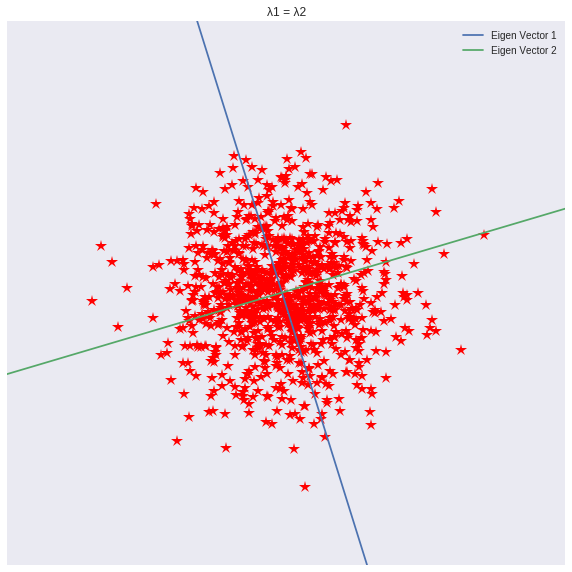

In [8]:
mean = [0, 0]
cov = [[1,0], [0,1]]
data = np.random.multivariate_normal(mean, cov, 1000)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors, u"\u03BB"+'1 = '+u"\u03BB" +'2')
print(eigenvalues)

###Unequal Eigen values $\lambda_{1} \neq \lambda_{2}$


For the data with mean = $[0,0]$ and covariance $[[0.8,0.5], [0.2,0.2]]$, we can visualize the below eigen vectors. Here, one eigen value is greater than the other and the distribution is elongated in the direction of that eigen vector.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


[9.65981507 2.70317088]


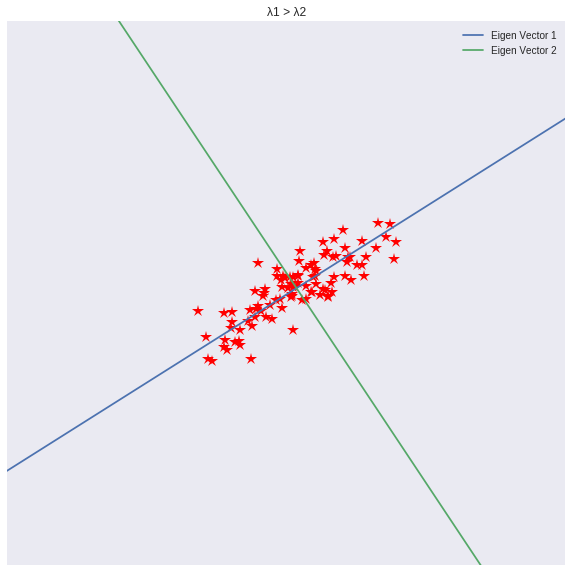

In [9]:
mean = [0, 0]
cov = [[0.8,0.5], [0.2,0.2]]
data = np.random.multivariate_normal(mean, cov, 100)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors,u"\u03BB"+'1 > '+u"\u03BB" +'2')
print(eigenvalues)

### One of the Eigen values is zero, $\lambda_{1} = 0$

For the data with mean = $[0,0]$ and covariance $[[0,0], [0,1]]$, we can visualize the below eigen vectors. Here, only one Eigen value is non-zero, distribution of data will align on that Eigen vector and the distribution is along vertical axis.

[10.83897315  0.        ]


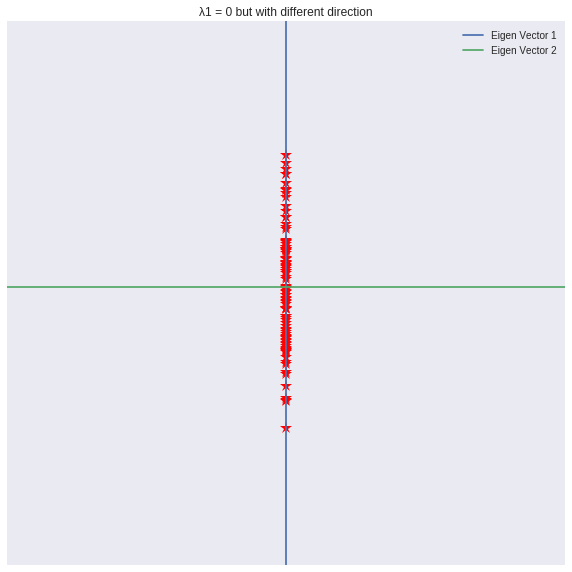

In [10]:
mean = [0, 0]
cov = [[0,0], [0,1]]
data = np.random.multivariate_normal(mean, cov, 100)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors, u"\u03BB" +'1 = 0 but with different direction')
print(eigenvalues)

### One of the Eigen values is zero, $\lambda_{2} = 0$

For the data with mean = $[0,0]$ and covariance $[[1,0], [0,0]]$, we can visualize the below eigen vectors. Here, only one Eigen value is non-zero, distribution of data will align on that Eigen vector and the distribution is along horizontal axis.


[10.93178953  0.        ]


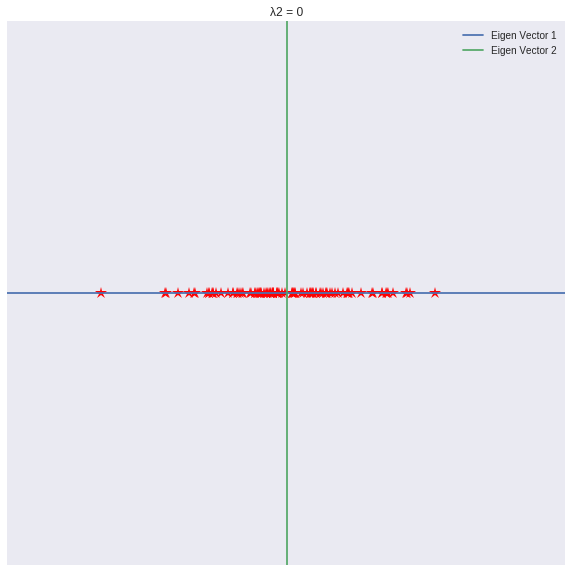

In [11]:
mean = [0, 0]
cov = [[1,0], [0,0]]
data = np.random.multivariate_normal(mean, cov, 100)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors, u"\u03BB" +'2 = 0')
print(eigenvalues)